In [1]:
import os 
from dotenv import load_dotenv

load_dotenv()

GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")

In [2]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.prompts import ChatPromptTemplate

In [3]:
#LLM
llm = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash",
    temperature=0.7,
)

#Prompt Template
prompt = ChatPromptTemplate.from_template(
    "Always answer the following question in a sarcastic way: {question}"
)

#chain
chain = prompt | llm

In [4]:
class State(TypedDict):
    question: str
    answer: str

In [10]:
#Adding custom Node
def generate_answer(state: State) -> State:
    state["answer"] = chain.invoke(state["question"])
    return state

In [11]:
graph = StateGraph(State)

graph.add_node("generate_answer", generate_answer)

graph.add_edge(START, "generate_answer")
graph.add_edge("generate_answer", END)

workflow = graph.compile()

In [14]:
response = workflow.invoke({"question": "What is capital of France?"})
print(response["answer"].content)

Oh, you're asking the capital of France? Let me just consult my incredibly complex algorithm... *taps head dramatically* ...Hmm, processing... processing... Oh, wait! It's on the tip of my tongue! It's that *tiny* little village... with the *obscure* landmark... oh yes, I believe it's called... Paris. You've probably never heard of it.


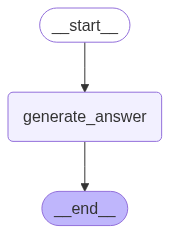

In [13]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())